# Inferential Statistics - Frequentism

## Section 1: An introduction to sampling from the Normal distribution

While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, I used [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) from [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) throughout my work. First to give you context, in this notebook I wanted to explore the ways I can generate the Normal distribution and to introduce the practical concepts of working with probability, random variables, and sampling distributions and produce the ability to apply these concepts in Python. I have made some commentary throughout my notebook to help to solidify my understanding through teaching it to you- the reader! 

In [66]:
#Must import these packages 
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

 I called up the documentation for the `norm` function imported above to see that the Probability Density Function (PDF) is the second listed method for the norm function.

In [10]:
norm.rvs?

In [59]:
#Generating random variates to draw 5 samples with a standard normal distribution. 
test_sample=norm.rvs(size=5)

test_sample

array([ 1.07127325,  0.73297886, -0.6135027 ,  1.74669335, -0.82337454])

Calculated the mean as shown below. The mean of a standard normal distribution is 0, however, the calculated mean using the numpy function is 0.4

In [61]:
# Calculating the mean of the test_sample:
np.mean(test_sample)

0.42281364244679426

Manually calculated the standard deviation of these numbers using the standard deviation formula: $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$

In [62]:
# Sum of mean squares 
ms = np.sum((test_sample - np.mean(test_sample)) ** 2)

# Divide by n 
n = len(test_sample)
ms / n

# Take the square root of the result
std_dev = np.sqrt(ms / n)

std_dev

0.9895752982403432

Here I have calculated the actual standard deviation of a small data set (sample size = 5). This small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because I could keep drawing normal random variates until my computers die. <br>

Thus, **generally speaking, the sample mean we calculate will not be equal to the population mean...** <br>
This is because the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean.... In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). <br> 

Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the sample size, $n$, in the denominator is replaced by $n-1$.

Using the same **_test_sample_** I created above, I calculated the **population** standard deviation manually using Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$ 

In [63]:
# Sum of mean squares 
ms = np.sum((test_sample - np.mean(test_sample)) ** 2)

# Divide by n - 1 (Bessel's correction)
n = len(test_sample)
ms / (n - 1) 

# Take the square root of the result
std_bessel = np.sqrt(ms / (n - 1))

std_bessel

1.1063788178600178

In [65]:
std_bessel == std_dev

False

In [64]:
# Using the numpy function to calculate the standard deviation of my test_sample and to compare it with the standard 
# deviation I manually calculated ("std_dev"), which does not take in the consideration of using Bessel's Correction:

print(np.std(test_sample))

if np.std(test_sample)==std_dev:
    print('True')

0.9895752982403432
True


In [22]:
# Using the numpy function to calculate the standard deviation of my test_sample with Bessel's Correction:
np.std(test_sample, ddof=1)


1.238245806693763

In [67]:
np.std(test_sample, ddof=1) == std_bessel

True

### Summary of Section 1:

In section 1, I imported the scipy.stats package and used it to draw a small sample from a standard normal distribution and assigned it to the variable "test_sample". Then I have calculated the mean of test_sample. This is not exactly equal to the expected population parameter (which can be correctly assumed because I generated the random variates from a specific, known distribution). I introduced two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). In these these calculations, I realzied that np.std() performs the calculation without using Bessel's correction by default. In order to generate Bessel's Correction with np.std() you use Delta Degrees of Freedom (ddof) equal to 1.

To reiterate: <br>

$n$ as the denominator is used to calculate the standard deviation of a sequence of numbers <br> 

$n-1$ as the denominator is used on this sequence of numbers to estimate the **_population parameter_** <br>


Some of the terminology can be a little confusing, but I will try my best below: <br>
The population parameter is traditionally written as **$\sigma$** and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the **sample standard deviation (using $n-1$)** whereas the **standard deviation of the sample uses $n$.** <br>

That's right, the **_sample standard deviation_** and the **_standard deviation_** are two separate terminologies and imply different meanings. They are **NOT** the same thing!

The **sample standard deviation** is the best (unbiased) estimate of the **population parameter ($\sigma$)** with this equation: <br>
\begin{equation} s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,\end{equation}


If the data set _is_ the entire population, the standard deviation for the population parameter ($\sigma$) can be calculated  via the equation shown below: <br>
\begin{equation}\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}\end{equation} <br>

If the sample _is_ the population then you know absolutely everything about your population, there are no probabilities really to calculate and no inference to be done. <br>

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population and the standard deviation of your sample is **not** an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that **_population parameter ($\sigma$)_** via the **sample standard deviation** equation, which uses the $n-1$ denominator.

## Section 2: Sampling Distributions

All we know about the population is what we see in the sample. From this sample, inferences can be made about the population. This can be done by looking at the histogram of the values and calculating the mean and standard deviation as estimates of the population parameters. In other words, in order to make some claims about the general population, a sample from a pool must be taken from the population, which is what we call sample size $n$. But what if we were to take different sample sizes $n$? Would we get the same result? Would we make the same claims about the general population? This leads to a fundamental question in this section: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

To answer the questions above, I have simulated the standard normal distribution, with its variance equal to its standard deviation of one. I generated a data set using 'norm.rvs' imagining I retreived data from a town of 50,000 with recorded height of everyone in this town. The population mean height is 172 cm and population standard deviation is 5 cm:

In [41]:
import seaborn as sns
sns.set()
sns.set_style({'axis.grid':False})

In [26]:
#Generating 50,000 height measures with average height 172 and standard deviation 5:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

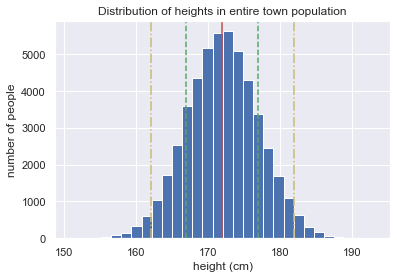

In [73]:
# Creating a histogram with the information above from pop_heights 
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='g', linestyle='--')
_ = plt.axvline(172-5, color='g', linestyle='--')
_ = plt.axvline(172+10, color='y', linestyle='-.')
_ = plt.axvline(172-10, color='y', linestyle='-.')

In [28]:
# Created a function that will help draw a random smaple of size n:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say I out one day and randomly sample 10 people to measure and plotted a histogram. 

In [74]:
# Randomly sampling 10 people to measure 
seed(47)
daily_sample1 = townsfolk_sampler(10)

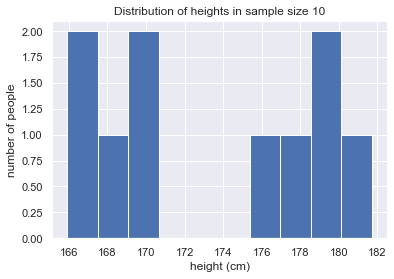

In [43]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

In [30]:
np.mean(daily_sample1)

173.47911444163503

The sample distribution doesn't look similar to the population distribution plotted earlier (but we will never know in real-life either because practically it is hard to retrieve data from every single person in the population).

And what would happen to the population distribution and height mean if I went out and repeated this experiment and collected another random sample size 10?

In [31]:
daily_sample2 = townsfolk_sampler(10)

In [32]:
np.mean(daily_sample2)

173.7317666636263

In [81]:
print("Mean of 1st Sample:", np.mean(daily_sample1))
print("Mean of 2nd Sample:", np.mean(daily_sample2))

Mean of 1st Sample: 173.47911444163503
Mean of 2nd Sample: 173.7317666636263


The means between the 1st random sample and 2nd random smaples are practically the same and there is not much difference. This si because the sample size is the same. 

Next, I simulated this random trial of sampling 10 people every day for a year. I calculated the mean of each daily sample of 10 and plotted the resultant sampling distribution of the mean.

In [33]:
seed(47)
# calculate daily means from a 10 sample size:
sample= [np.mean(townsfolk_sampler(10)) for i in range(365)]

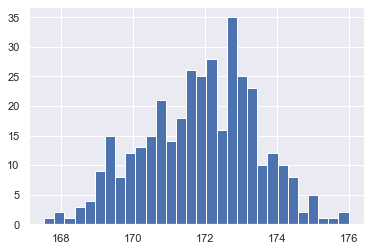

In [40]:
plt.hist(sample, bins=30)
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population each day for a year totaling 3,650 size. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

In [44]:
np.mean(sample)

171.8660049358649

In [45]:
np.std(sample, ddof=0)

1.5756704135286475

Remember, in this instance, the population parameters was known: average height= 172 cm and standard deviation= 5 cm

I repeated the above year's worth of samples but for a sample size of 50 each day and compared my resultant summary statistics to those predicted by the CLT. Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)?

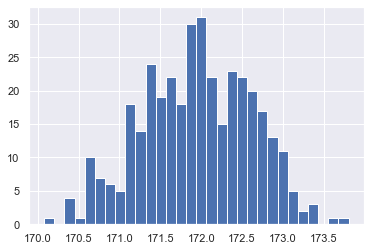

In [46]:
seed(47)
# calculate daily means from a 50 sample size:
sample50 = [np.mean(townsfolk_sampler(50)) for i in range(365)]
plt.hist(sample50, bins=30)
plt.show()

In [47]:
np.mean(sample50)

171.94366080916114

In [48]:
np.std(sample50)

0.6736107539771146

### Summary of Section 2:

We can estimate population parameters from a sample from the population, and that samples have their own distributions. As the samples can vary from one draw to another, so will the sample statistics. If we were to perform repeat draws of size n and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as the sample size (n) increases. In other words, the narrower the sampling distributions gets.

## Section 3: Normal Testing

Remember, it is rare (if ever) to actually know the population parameters but it is possible to estimate them. In order to make inferences such as "is this observation unusual?" or "has my population mean changed?" then it is needed to have some idea of what the underlying distribution to calculate relevant probabilities. In this section, I take a look of how these probabilities work.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

Understanding the basic properties of the standard Normal distribution can easily help calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution.

Since about 68% of observations are within plus or minus 1 standard deviation of the mean in a Normal distrubtion, then the area not covered by plus or minus 1 standard deviation is ~32%. Thus, the probability of selecting values above 1 standard deviation is about ~16%. Oppositly, the probability of observing a value less than or equal to 1 standard deviation from the mean would be 84%. 

In [82]:
#Confirming the probability of observing a value less than or equal to 1 
# standard deviation from the mean usig "norm.cdf"

# The area that lies below the value of 1 in a standard normal distribution 

norm.cdf(1)

0.8413447460685429

Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less?

In the problem above, the population mean was 172cm and population standard deviation was 5cm. Height of 177cm is exactly one standard deviation above the mean. Thus the probability of selecting one person with height being 177cm at random is 84.13%

In [50]:
norm.cdf(x=177, loc=172, scale=5)

0.8413447460685429

What if I randomly picked one person and measure their height and find they are 200 cm tall?

Just by eyeballing it, height of 200 cm is more than 5 standard deviations above the mean (200 > 172 + (5 * 5)). We know from empirical evidence that -3σ to 3σ covers 99.9% of the whole normal distribution. Thus we should be very surprised for finding a person with height of 200 cm. We can verify this using scipy.stats.norm function. The probability is 1.071e-08, which is close to zero.

In [52]:
1 - norm.cdf(x=200, loc=172, scale=5)

1.0717590259723409e-08

Below, I started from the position of knowing nothing about the heights of people of the town and performed the following calculations:
* Used seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places using norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [83]:
# Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
seed(47)
size = 50
# take your sample now
sample_50 = townsfolk_sampler(size)

In [84]:
# Estimate the population mean using np.mean
sample_mean = np.mean(sample_50)
print("Estimated population mean is: {}".format(sample_mean))

Estimated population mean is: 172.7815108576788


In [85]:
# Estimate the population standard deviation using np.std (remember which denominator to use!)
# use ddof = 1 since we're using sample to estimate the unbiased population parameter (std)
sample_std = np.std(sample_50, ddof=1)
print("Estimated population standard deviation is: {}".format(sample_std))

Estimated population standard deviation is: 4.195424364433547


### Conducted a two-tail test to approximate the best estimate of the population mean:

In [93]:
# Calculate the (95%) margin of error 
# (use the exact critial z value to 2 decimal places using norm.ppf())

# for two-tailed test: 2.5% will be on either side of the rejection area 
# thus get ppf(0.975)

# Equation: Critical value (use z-statistic) x Standard error of the sample.
critical_value = norm.ppf(0.975)
standard_error = sample_std / (np.sqrt(size))


margin_of_error = critical_value * standard_error


print("Estimated margin of error is: {}".format(margin_of_error))

Estimated margin of error is: 1.1628909342876539


In [95]:
# Calculate the 95% Confidence Interval of the mean
ci95_lower = sample_mean - margin_of_error
ci95_upper = sample_mean + margin_of_error

print("95% Confidence Interval is: [{},{}]".format(ci95_lower, ci95_upper))

95% Confidence Interval is: [171.61861992339115,173.94440179196644]


Above I calculated the confidence interval using the critical z value, however, I should have used a t-score instead of a z-score since we don't know the population standard deviation. 

Calculating the 95% confidence interval for the mean using the _t_ distribution is wider than the normal distribution since t-distribution curves are wider and fatter at the tails compared to normal distribution curves.

### Conducting a two-tailed test using t-critical values:

In [96]:
t_critical = t.ppf(0.975, size-1)
t_critical

2.009575234489209

In [97]:
margin_of_error_t = t_critical * standard_error

ci95_lower_t = sample_mean - margin_of_error_t
ci95_upper_t = sample_mean + margin_of_error_t

print("95% Confidence Interval is: [{},{}]".format(ci95_lower_t, ci95_upper_t))

95% Confidence Interval is: [171.589184447403,173.9738372679546]


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## Conclusion: 

Again, it is rare (if ever) to know the true population parameters. We have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation, thus why sample sizes are larger than one. <br> 

This means we calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, one result highlighted from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size. This is the key driver for us 'requiring' a certain sample size. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.